## Import packages
### Standard modules
* glob: [Unix style pathname pattern expansion.](https://docs.python.org/3/library/glob.html?highlight=glob#module-glob)
* gzip: [This module provides a simple interface to compress and decompress files.](https://docs.python.org/3/library/gzip.html)
* math: [Mathematical functions.](https://docs.python.org/3/library/math.html)
* os: [Miscellaneous operating system interfaces.](https://docs.python.org/3/library/os.html?highlight=os#module-os)
* random: [Generate pseudo-random numbers.](https://docs.python.org/3/library/random.html?highlight=random#module-random)
* shutil: [Offers a number of high-level operations on files and collections of files.](https://docs.python.org/3/library/shutil.html?highlight=shutil#module-shutil)
* struct: [Interpret bytes as packed binary data.](https://docs.python.org/3/library/struct.html?highlight=struct#module-struct)

### Jupyter notebook modules
* jupyter: [Coding framework.](https://docs.jupyter.org/en/latest/)
* IPython: [IPython provides a rich toolkit to help you make the most of using Python interactively.]
(https://ipython.readthedocs.io/en/stable/)
* ipywidgets: [Jupyter Widgets are interactive browser controls for Jupyter notebooks.](https://ipywidgets.readthedocs.io/en/latest/)

### Additional packages
* imageio: [Provides an easy interface to read and write a wide range of image data.](https://imageio.readthedocs.io/en/stable/)
* matplotlib: [Library for creating static, animated, and interactive visualizations.](https://matplotlib.org/stable/users/index)
* numpy: [Library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays.](https://numpy.org/doc/stable/)
* torch: [An optimized tensor library for deep learning using GPUs and CPUs.](https://pytorch.org/docs/stable/index.html)
* torchvision: [Package consists of popular datasets, model architectures, and common image transformations for computer vision.](https://pytorch.org/vision/stable/index.html)
* tqdm : [Adds a smart progress meter to loops.](https://tqdm.github.io/)
* wget: [Package for downloading files from web addresses.](https://pypi.org/project/wget/)

In [1]:
# Import python standard modules.
import glob
import gzip
import math
import os
import random
import shutil
import struct

# Jupyter notebook modules.
from IPython.display import Image

# Install additional packages.
!pip install -qq imageio matplotlib numpy torch torchvision tqdm wget jupyter ipywidgets==7.4.2

# Import the installed packages. 
import imageio
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from tqdm.notebook import tqdm
import wget

print('Finished importing the packages.')

Finished importing the packages.


## Define arguments
### DATA_*
Arguments for loading the data.
* DATA_FILE_TYPES: The file extensions of the norb dataset.
* DATA_FOLDER: The folder where the data files are stored.
* DATA_PREFIXES: The file prefix of the norb file names.
* DATA_NUMBERS_FOR_MAPPING_DATA_TYPES: The magic number encodes the element type of the matrix. Note: This are only the numbers needed for the files in this project.
* DATA_URL: Url for downloading the data files.

### PREP_*
Arguments for preparing the data.
* PREP_BATCH_SIZE: Defines how many files are prosseced in each step.
* PREP_CAMERA: Index of the camera (channel of the image).
* PREP_IMAGE_SIZE: Pixel size of the images.
* PREP_SHUFFLE_DATA: If true, the data is shuffeld.

### RUN_*
Arguments for definning and running the neural network.
* RUN_CRITIC_REPEAT: Defines how offten the critic is used in each step.
* RUN_DEVICE: Which device to use for running the network (cuda or cpu).
* RUN_DROPOUT_VALUE: Probability of an element to be zeroed.
* RUN_EPOCHS: Defines how offten the training is repeated for all data.
* RUN_HIDDEN_DIM: The ground value for the dimensions in the hidden layers.
* RUN_LEAK_VALUE: Controls the angle of the negative slope for the leakyRelu function.
* RUN_OPT_BETA_1: Parameter for the Adam optimizer. The exponential decay rate for the first-moment estimates.
* RUN_OPT_BETA_2: Parameter for the Adam optimizer. The exponential decay rate for the second-moment estimates.
* RUN_OPT_LR: Weight of the gradient penalty
* RUN_Z_DIM: Defines hwo many channels the noise tensor has.

### RES_*
Arguments for showing the results.
* RES_GIF_FILE: Name and path for storing the gif file, containing the result data.
* RES_IMAGE_AMOUNT: How many images to show.
* RES_LOSS_DATA_CRIT = File for storing the critic loss values.
* RES_LOSS_DATA_GEN = File for storing the generator loss values.
* RES_LOSS_DATA_TEST = File for storing the test loss values.
* RES_LOSS_PLOT_TEST = File for storing the test loss plot. 
* RES_LOSS_PLOT_TRAIN = File for storing the training loss plot. 
* RES_MODEL_PATH: Path for storing the models.
* RES_PLOT_COLUMNS: The amount of images in one row of the plot.
* RES_PLOT_SIZE: The size of the plots widht and height in inches.

In [2]:
# Define variables.
DATA_FILE_TYPES = ['info', 'cat', 'dat']
DATA_FOLDER = "./decrompressed/"
DATA_PREFIXES = {
    'train': 'smallnorb-5x46789x9x18x6x2x96x96-training-',
    'test': 'smallnorb-5x01235x9x18x6x2x96x96-testing-',
}
DATA_NUMBERS_FOR_MAPPING_DATA_TYPES = {
    '1e3d4c55': np.uint8,
    '1e3d4c54': np.int32,
}
DATA_URL = 'https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/'

PREP_BATCH_SIZE = 32
PREP_CAMERA = 0
PREP_IMAGE_SIZE = 96
PREP_SHUFFLE_DATA = True

RUN_CRITIC_REPEAT = 3
RUN_CRITIC_LAMBDA = 10.0
RUN_DEVICE = 'cuda'
RUN_DROPOUT_VALUE = 0.2
RUN_EPOCHS = 10
RUN_HIDDEN_DIM = 32
RUN_LEAK_VALUE = 0.2
RUN_OPT_BETA_1 = 0.9
RUN_OPT_BETA_2 = 0.999
RUN_OPT_LR = 0.001
RUN_Z_DIM = 100

RES_GIF_FILE = 'norb_test_images.gif'
RES_IMAGE_AMOUNT = 9
RES_LOSS_DATA_CRIT = 'norb_loss_crit.txt'
RES_LOSS_DATA_GEN = 'norb_loss_gen.txt'
RES_LOSS_DATA_TEST = 'norb_loss_test.txt'
RES_LOSS_PLOT_TEST = 'norb_loss_plot_test.png'
RES_LOSS_PLOT_TRAIN = 'norb_loss_plot_train.png'
RES_MODEL_PATH = './'
RES_PLOT_COLUMNS = 5
RES_PLOT_SIZE = 21

print('Finished setting the arguments.')

Finished setting the arguments.


## Load files
### Description
Download the files and convert the binary data to tensor objects. Afterwards show some examples.

### Functions
* download_and_unzip: Downloads and unzips a file.
* get_int_from_file: Helper function for reading int from binary file.
* load_norb_data: Load the norb data from binary files and convert it to images.
* show_tensor_images: Shows images using pyplot from the matplotlib package. Also prints some information about the images.

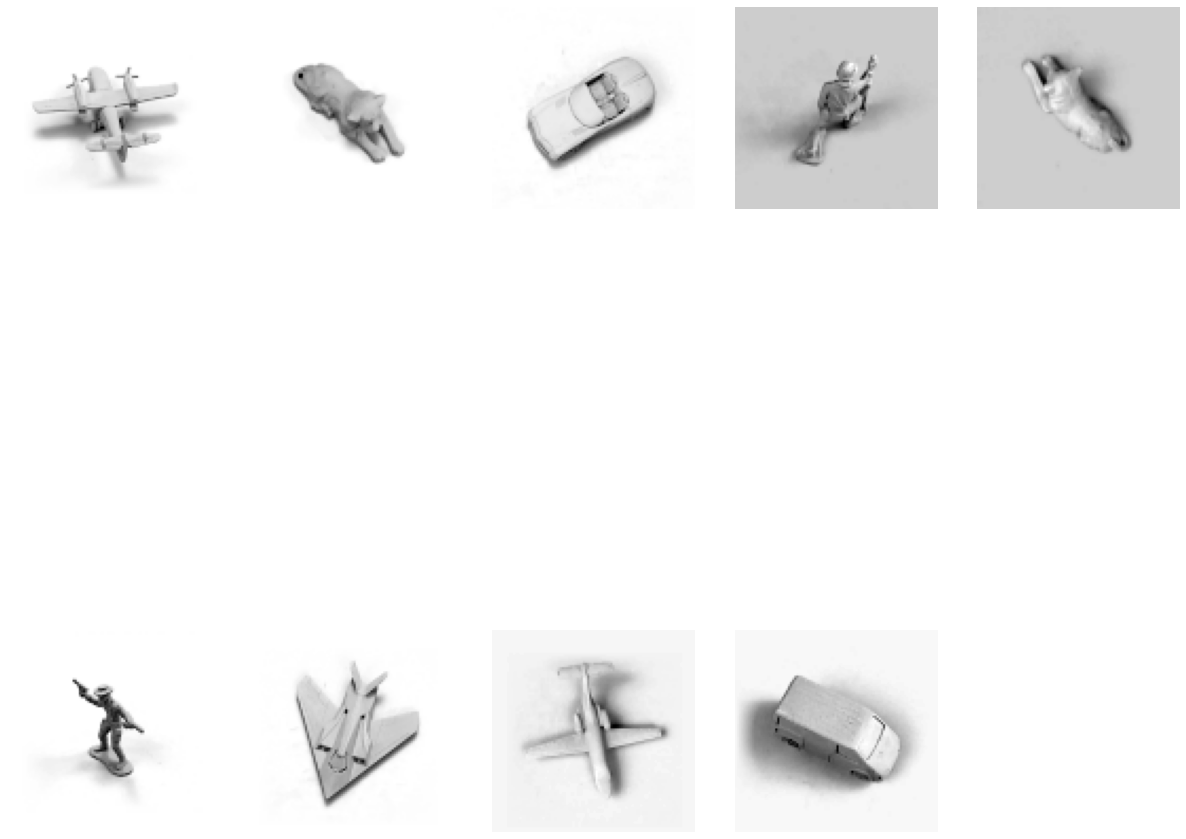

1: 2 [ 6  2 22  5]
2: 0 [ 6  8 32  5]
3: 4 [ 7  8 28  3]
4: 1 [8 4 6 4]
5: 0 [ 6  8 14  2]
6: 1 [ 4  0 30  5]
7: 2 [ 4  8 34  1]
8: 2 [8 7 4 2]
9: 3 [7 6 2 4]
Finished loading files.


In [3]:
def download_and_unzip(file_name: str, file_extension: str, dst_folder: str, url: str) -> None:
    """
    Downloads and unzips a file.
    
    Parameters
    ----------
    file_name: str
         The basename of the compressed file (without the extension for the compressed version).
    file_extension: str
        The file extension for the compressed version.
    dst_folder: str
        Destination folder for the files.
    url: str
        Source url for the file, without the filename.
    """
    # Build file and zip path.
    file_path = os.path.join(dst_folder, file_name)
    gz_name = file_name + '.gz'

    # Check if the data folder already exists, if not create the folder.
    if not os.path.exists(dst_folder):
        os.mkdir(dst_folder)

    # Check if this file already exists.
    if not os.path.exists(file_path):
        # Download the file.
        wget.download(url + gz_name , gz_name)

        # Decrompress the file and move it to the folder.
        with gzip.open(gz_name, 'rb') as f_in:
            with open(file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        # Delete the compressed version afterwards.
        os.remove(gz_name)

def get_int_from_file(f: object) -> int:
    """
    Helper function for reading int from binary file.
    
    Parameters
    ----------
    f: file-object
        The data file.
    
    Returns
    -------
    int
        The content of the file as integer.
    """
    num, = struct.unpack('i', f.read(4))
    return num


def load_norb_data(file_folder: str, file_prefix: object, file_types: list, map_data_types: object) -> object: 
    """
    Load the norb data from binary files and convert it to images.
    
    Paramaters
    ----------
    map_data_types
    file_folder: str
        The folder where the data files are stored.
    file_prefix: object of str
        The file prefix of the norb file names.
    file_types: list of str
        The file extensions of the norb dataset.
    map_data_types: object of numpy.dtype
        The magic number encodes the element type of the matrix.
        
    Returns
    -------
    object
        Images of the norb dataset.
    """
    # Define return object.
    loaded_data = {}
    
    # Loop over each file.
    for dataset, prefix in file_prefix.items():
        for filetype in file_types:
            # Set up the file name and path for reading the files.
            filename = prefix + filetype + ".mat"
            file_loc = os.path.join(file_folder, filename)

            with open( file_loc, 'rb') as f:
                # Read the magic_num, convert it to hexadecimal and look up the data_type.
                raw_magic_num = get_int_from_file(f)
                magic_num = format(raw_magic_num, '02x')
                data_type = map_data_types[magic_num]

                # Read how many dimensions to expect.
                ndim = get_int_from_file(f)

                # Read at least 3 ints, or however many ndim there are.
                shape = [
                    get_int_from_file(f)
                    for i in range(max(ndim, 3))
                ]   

                # But in case ndims < 3, take at most n_dim elements.
                shape = shape[:ndim]

                # Now load the actual data.
                loaded_data[(dataset, filetype)] = np.fromfile(
                    f, 
                    dtype=data_type, 
                    count=np.prod(shape)
                ).reshape(shape)
    
    return loaded_data        


def show_tensor_images(image: np.array, infos: list, columns: int, size: int, channel: int =-1, file_path: str ='') -> None:
    """
    Shows images using pyplot from the matplotlib package. Also prints some information about the images.
    
    Parameters
    ----------
    image: np.array
        The image numpy array.
    infos: list of str
        Contains some information about the images.
    columns: int
        The amount of columns for the plot
    size: int
        The size of the plots widht and height in inches.
    channel: int, optional
        If -1 all channels are showen as rgb image. If not -1 only this specific channel is shown as grayscale image.
    file_path: str, optional
        If '' the plots are not saved as gif. If not '' the contant of file_path is used to save the images as png.
    """
    # Get the image amount and define the amount of rows for the plot.
    image_length = len(image)
    rows = math.ceil(image_length / columns)
    
    # Set the size for each image in the plot.
    fig = plt.figure(figsize=(size,size)) 
    
    # Loop over each image and add it to the plot.
    for i in range(0, image_length):
        plt.subplot(rows, columns, i+1)
        
        if channel == -1:
            plt.imshow(images[i], cmap="rgb")
        else:
            plt.imshow(image[i][channel], cmap="gray")
            
        plt.axis('off')
    
    # Save the file, if file_path is set.
    if file_path != '':
        plt.savefig('{}.png'.format(file_path))
    
    plt.show()
    
    # Print the content of the infos list.
    for j in range(0, len(infos)):
        print(f'{j+1}: {infos[j]}')


# Loop over each file prefix and file type and download the files.
for prefix in DATA_PREFIXES:
    for t in DATA_FILE_TYPES:   
        download_and_unzip(DATA_PREFIXES[prefix] + t + '.mat', '.gz', DATA_FOLDER, DATA_URL)
                
# Load the data files.
loaded_data = load_norb_data(DATA_FOLDER, DATA_PREFIXES, DATA_FILE_TYPES, DATA_NUMBERS_FOR_MAPPING_DATA_TYPES)

# Show some random original images.
idx = np.random.randint( loaded_data[('train', 'cat')].shape[0], size=RES_IMAGE_AMOUNT)

# Collect the information from the files for showing some examples.
infos = []
images = []
for i in idx:
    # Print The information for this file. Based on cat and info file.
    info_text = str(loaded_data[('train', 'cat')][i]) + ' ' + str(loaded_data[('train', 'info')][i])
    infos.append(info_text)
    
    # Get the image data from the dat file.
    images.append(loaded_data[('train', 'dat')][i])
    
# Show image.
show_tensor_images(np.array(images), infos, RES_PLOT_COLUMNS, RES_PLOT_SIZE, 0, '')

print('Finished loading files.')

## Preprocess data
### Description
Here the data are preproccesed (normalization, resizing etc.) and a data loader is created, that can be used for training the model.

### Transformation steps
* Selecting a specific camera (tensor channel).
* Converting the tensor values from a range of 0 to 255 to a range of 0 to 1.
* Insure that all images have the same size.

In [4]:
# Load the content from the dat files.
images_train = torch.from_numpy(loaded_data[('train', 'dat')])
images_test  = torch.from_numpy(loaded_data[('test', 'dat')])

# Load the content from the cat files.
category_train = torch.from_numpy(loaded_data[('train', 'cat')])
category_test  = torch.from_numpy(loaded_data[('test', 'cat')])

# Define transformation for the data.
transform = transforms.Compose([
    transforms.Lambda(lambda x: x[PREP_CAMERA]),
    transforms.Lambda(lambda x: (x - 127.5) / 127.5),
    transforms.ToPILImage(),
    transforms.Resize(PREP_IMAGE_SIZE),
    transforms.ToTensor()
])

# Transform the training data.
data_train = torch.empty([images_train.size(0), 1, PREP_IMAGE_SIZE, PREP_IMAGE_SIZE])
for i in range(0, images_train.size(0)):
    data_train[i] = transform(images_train[i])

# Transform the test data.
data_test = torch.empty([images_test.size(0), 1, PREP_IMAGE_SIZE, PREP_IMAGE_SIZE])
for i in range(0, images_test.size(0)):
    data_test[i] = transform(images_test[i])
    
# Create data sets for training and test files.
data_train = torch.utils.data.TensorDataset(data_train, category_train)
data_test = torch.utils.data.TensorDataset(data_test, category_train)

# Merge both datasets.
merged_data = torch.utils.data.ConcatDataset([data_train, data_test])

# Create a dataloader for the data.
loader_train = torch.utils.data.DataLoader(merged_data, batch_size=PREP_BATCH_SIZE, shuffle=PREP_SHUFFLE_DATA)

print('Finished preproccessing the data.')

Finished preproccessing the data.


## Define the network
### Description
Defines a function for creating the noise vector and the classes for genrator and critic.

In [5]:
def get_noise(n_samples: int, z_dim: int, device: str ='cpu') -> torch.Tensor:
    """
    Create a noise vector with dimensions (n_samples, z_dim)
    
    Parameters
    ----------
    n_samples: int
        The amount of samples.
    z_dim: int
        The amount of dimensions/channels.
        
    Returns
    -------
    torch.tensor
        Noise vector.
    """
    return torch.randn(n_samples, z_dim, device=device)


class Generator(torch.nn.Module):
    """ 
    The generator class for producing fake images.
    
    Parameters
    ----------
    z_dim: int
        The dimensions/channels of the noise vector.
    hidden_dim: int
        The ground value for the dimensions in the hidden layers.
    dropout_value: float, optional
        Probability of an element to be zeroed.
    leak_value: float, optional
        Controls the angle of the negative slope.
    """
    def __init__(self, z_dim: int, hidden_dim: int, dropout_value: float =0.5, leak_value: float = 0.01) -> None:
        """
        Initialization function for the gernator. 
        Defines how many network blocks are used and which are used for each block.
        """
        super(Generator, self).__init__()
        
        self.convt = torch.nn.Sequential(
            self.convTranspose2d_block(z_dim, hidden_dim, 3, 1, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 3, 2, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 5, 1, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 5, 2, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 7, 1, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 7, 2, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, hidden_dim, 12, 1, dropout_value, leak_value),
            self.convTranspose2d_block(hidden_dim, 1, 19, 1, dropout_value, leak_value, final_layer=True)          
        )

        self.linear = torch.nn.Sequential(
            self.linear_block(z_dim, hidden_dim*2, dropout_value, leak_value),
            self.linear_block(hidden_dim*2, hidden_dim, dropout_value, leak_value),
            self.linear_block(hidden_dim, 1, dropout_value, leak_value, final_layer=True)
        )

    def convTranspose2d_block(self, input_channels: int, output_channels: int, 
                  kernel_size: int, stride: int, dropout_value: float, 
                  leak_value: float, final_layer: bool =False) -> torch.nn.Sequential:
        """
        Implements a set of layers for the network. The main part of this block is the ConvTranspose2d layer.
        
        Parameters
        ----------
        input_channels: int
            Number of channels in the input image.
        output_channels: int
            Number of channels produced by the convolution.
        kernel_size: int
            The size of the filters that are used.
        stride: int
            The amount of steps taken, moving from one frame to another the next frame.
        dropout_value: float
            Probability of an element to be zeroed.
        leak_value: float
            Controls the angle of the negative slope.
        final_layer: bool
            Flag for differentating between the final layer and all other layers.
        
        Returns
        -------
        torch.nn.Sequential
            A combination of different layers for the generator.
        """
        if not final_layer:
            # Define the block for not final layer.
            return torch.nn.Sequential(
                torch.nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                torch.nn.InstanceNorm2d(output_channels),
                torch.nn.LeakyReLU(leak_value, inplace=True),
                torch.nn.Dropout(dropout_value)
            )
        else:
            # Define the block for the final layer.
            return torch.nn.Sequential(
                torch.nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                torch.nn.BatchNorm2d(output_channels),
                torch.nn.Tanh()
            )
    
    def linear_block(self, input_channels: int, output_channels: int, dropout_value: float, 
                  leak_value: float, final_layer: bool =False) -> torch.nn.Sequential:
        """
        Implements a set of layers for the network. The main part of this block is the linear layer.
        
        Parameters
        ----------
        input_channels: int
            Number of channels in the input image.
        output_channels: int
            Number of channels produced by the convolution.
        dropout_value: float
            Probability of an element to be zeroed.
        leak_value: float
            Controls the angle of the negative slope.
        final_layer: bool
            Flag for differentating between the final layer and all other layers.

        Returns
        -------
        torch.nn.Sequential
            A combination of different layers for the generator.
        """
        if not final_layer:
            # Define the block for not final layer.
            return torch.nn.Sequential(
                torch.nn.Linear(input_channels, output_channels),
                torch.nn.LeakyReLU(leak_value, inplace=True),
                torch.nn.Dropout(dropout_value)
            )
        else:
            # Define the block for the final layer.
            return torch.nn.Sequential(
                torch.nn.Linear(input_channels, output_channels),
                torch.nn.Tanh()
            )
        
    def forward(self, noise: torch.Tensor) -> torch.Tensor:
        """
        Function for completing a forward pass of the generator.
        
        Parameters
        ----------
        noise: torch.Tensor
            A noise vector.
        
        Returns
        -------
        torch.Tensor
            An image.
        """
        x = noise.view(noise.size(0), noise.size(1), 1, 1)
        
        # Using convolution network.
        x = self.convt(x)
        
        # Using linear network.
        #x = torch.nn.functional.interpolate(x, (PREP_IMAGE_SIZE, PREP_IMAGE_SIZE))
        #x = self.linear(x)
        
        return x


class Critic(torch.nn.Module):
    """
    The critic class defining hwo real a fake image is.
    
    Parameters
    ----------
    img_channel: int
        The channels of the image.
    hidden_dim: int
        The ground value for the dimensions in the hidden layers.
    dropout_value: float, optional
        Probability of an element to be zeroed.
    leak_value: float, optional
        Controls the angle of the negative slope.
    """
    
    def __init__(self, img_channel: int, hidden_dim: int, dropout_value: float =0.5, leak_value: float = 0.01) -> None:
        super(Critic, self).__init__()
        """
        Initialization function for the critic. 
        Defines how many network blocks are used and which are used for each block.
        """
        self.conv = torch.nn.Sequential(
            self.conv2d_block(img_channel, hidden_dim, 19, 1, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 12, 1, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 7, 2, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 7, 1, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 5, 2, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 5, 1, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, hidden_dim, 3, 2, dropout_value, leak_value),
            self.conv2d_block(hidden_dim, 1, 3, 1, dropout_value, leak_value, final_layer=True)  
        )
        self.linear = torch.nn.Sequential(
            self.linear_block(img_channel, hidden_dim*2, dropout_value, leak_value),
            self.linear_block(hidden_dim*2, hidden_dim, dropout_value, leak_value),
            self.linear_block(hidden_dim, 1, dropout_value, leak_value, final_layer=True)
        )
        
    def conv2d_block(self, input_channels: int, output_channels: int,
                   kernel_size: int, stride: int, dropout_value: float,
                   leak_value: float, final_layer: bool =False) -> torch.nn.Sequential:
        """
        Implements a set of layers for the network. The main part of this block is the Conv2d layer.
        
        Parameters
        ----------
        input_channels: int
            Number of channels in the input image.
        output_channels: int
            Number of channels produced by the convolution.
        kernel_size: int
            The size of the filters that are used.
        stride: int
            The amount of steps taken, moving from one frame to another the next frame.
        dropout_value: float
            Probability of an element to be zeroed.
        leak_value: float
            Controls the angle of the negative slope.
        final_layer: bool
            Flag for differentating between the final layer and all other layers.
        
        Returns
        -------
        torch.nn.Sequential
            A combination of different layers for the generator.
        """
        if not final_layer:
            # Define the block for not final alyer.
            return torch.nn.Sequential(
                torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                torch.nn.InstanceNorm2d(output_channels),
                torch.nn.LeakyReLU(leak_value, inplace=True),
                torch.nn.Dropout(dropout_value)
            )
        else:
            # Define the block for the final alyer.
            return torch.nn.Sequential( 
                torch.nn.Conv2d(input_channels, output_channels, kernel_size, stride)
            )

    def linear_block(self, input_channels: int, output_channels: int, dropout_value: float,
                   leak_value: float, final_layer: bool =False) -> torch.nn.Sequential:
        """
        Implements a set of layers for the network. The main part of this block is the linear layer.
        
        Parameters
        ----------
        input_channels: int
            Number of channels in the input image.
        output_channels: int
            Number of channels produced by the convolution.
        dropout_value: float
            Probability of an element to be zeroed.
        leak_value: float
            Controls the angle of the negative slope.
        final_layer: bool
            Flag for differentating between the final layer and all other layers.
        
        Returns
        -------
        torch.nn.Sequential
            A combination of different layers for the generator.
        """
        if not final_layer:
            # Define the block for not final layer.
            return torch.nn.Sequential(
                torch.nn.Linear(input_channels, output_channels),
                torch.nn.LeakyReLU(leak_value, inplace=True),
                torch.nn.Dropout(dropout_value)
            )
        else:
            # Define the block for the final layer.
            return torch.nn.Sequential(
                torch.nn.Linear(input_channels, output_channels)
            )
        
    def forward(self, image: torch.Tensor) -> torch.Tensor:
        """
        Function for completing a forward pass of the critic.
        
        Parameters
        ----------
        image: torch.Tensor
            A image tensor with dimension (im_chan).
            
        Returns
        -------
        torch.Tensor
            A 1-dimension tensor representing fake/real.
        """
        
        # Using convolution network.
        x = self.conv(image)
        
        # Using linear network.
        #x = self.linear(x)
        #x = torch.nn.functional.interpolate(x, (1, 1))
        
        return x.view(len(x), -1)


print('Finished defining noise function, gernator and critic.')

Finished defining noise function, gernator and critic.


## Gradient Penalty
### Description
This part contains functions for calculating the gradient penalty.
### Functions
* get_gradient: Return the gradient of the critic's scores with respect to mixes of real and fake images.
* gradient_penalty: Return the gradient penalty, given a gradient. Given a batch of image gradients, you calculate the magnitude of each image's gradient and penalize the mean quadratic distance of each magnitude to 1.
* get_gen_loss: Return the loss of a generator given the critic's scores of the generator's fake images.
* get_crit_loss: Return the loss of a critic given the critic's scores for fake and real images, the gradient penalty, and gradient penalty weight.

In [6]:
def get_gradient(crit: Critic, real: torch.Tensor, fake: torch.Tensor, epsilon: torch.Tensor) -> torch.Tensor:
    """
    Return the gradient of the critic's scores with respect to mixes of real and fake images.
    
    Parameters
    ----------
        crit: Critic
            The critic model.
        real: : torch.Tensor
            A batch of real images.
        fake: torch.Tensor
            A batch of fake images.
        epsilon: torch.Tensor
            A vector of the uniformly random proportions of real/fake per mixed image.
    
    Returns
    -------
    torch.Tensor
        The gradient of the critic's scores, with respect to the mixed image.
    """
    # Mix the images together.
    mixed_images = real * epsilon + fake * (1 - epsilon)

    # Calculate the critic's scores on the mixed images
    mixed_scores = crit(mixed_images)
    
    # Take the gradient of the scores with respect to the images.
    return torch.autograd.grad(
        inputs=mixed_images,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores), 
        create_graph=True,
        retain_graph=True,
    )[0]


def gradient_penalty(gradient: torch.Tensor) -> torch.Tensor:
    """
    Return the gradient penalty, given a gradient.
    Given a batch of image gradients, you calculate the magnitude of each image's gradient
    and penalize the mean quadratic distance of each magnitude to 1.
    
    Parameters
    ----------
        gradient: torch.Tensor
            The gradient of the critic's scores, with respect to the mixed image.
    
    Returns
    -------
        penalty: torch.Tensor
            The gradient penalty.
    """
    # Flatten the gradients so that each row captures one image.
    gradient = gradient.view(len(gradient), -1)

    # Calculate the magnitude of every row.
    gradient_norm = gradient.norm(2, dim=1)
    
    # Penalize the mean squared distance of the gradient norms from 1.
    return torch.mean((gradient_norm -1)**2)


def get_gen_loss(crit_fake_pred: torch.Tensor) -> torch.Tensor:
    """
    Return the loss of a generator given the critic's scores of the generator's fake images.
    
    Parameters
    ----------
    crit_fake_pred: torch.Tensor
        The critic's scores of the fake images.
        
    Returns
    -------
    torch.Tensor
        A scalar loss value for the current batch of the generator.
    """
    return -1* torch.mean(crit_fake_pred)


def get_crit_loss(crit_fake_pred: torch.Tensor, crit_real_pred: torch.Tensor,
                  gp: torch.Tensor, c_lambda: float) -> torch.Tensor:
    """
    Return the loss of a critic given the critic's scores for fake and real images,
    the gradient penalty, and gradient penalty weight.
    
    Parameters
    ----------
    crit_fake_pred: torch.Tensor
        The critic's scores of the fake images.
    crit_real_pred: torch.Tensor
        The critic's scores of the real images.
    gp: torch.Tensor
        The unweighted gradient penalty.
    c_lambda: float
        The current weight of the gradient penalty
    
    Returns
    -------
    torch.Tensor
        A scalar for the critic's loss, accounting for the relevant factors.
    """
    return torch.mean(crit_fake_pred - crit_real_pred + gp * c_lambda)


print('Finished defining functions for calculating the Wasserstein-Loss.')

Finished defining functions for calculating the Wasserstein-Loss.


## Initialize the network
### Description
* Initialize the generator and the critic.
* Initialize the loss and optimizer function.
* Apply starting weights to generator and critic.

In [7]:
def weights_init(m: object) -> torch.Tensor:
    """
    Initialize the weights to the normal distribution with mean 0 and standard deviation 0.02.
    
    Parameters
    ----------
    m: object
        The mean weight value.
        
    Returns
    -------
    torch.Tensor
        Return the recommended gain value for the given nonlinearity function. 
    """
    if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, torch.nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)


# Initialize the generator and critic.
gen = Generator(RUN_Z_DIM, RUN_HIDDEN_DIM, RUN_DROPOUT_VALUE, RUN_LEAK_VALUE).to(RUN_DEVICE)
crit = Critic(1, RUN_HIDDEN_DIM, RUN_DROPOUT_VALUE, RUN_LEAK_VALUE).to(RUN_DEVICE)

# Define the loss function.
criterion = torch.nn.BCEWithLogitsLoss()

# Define the optimizer for generator and discriminator.
gen_opt = torch.optim.Adam(gen.parameters(), lr=RUN_OPT_LR, betas=(RUN_OPT_BETA_1, RUN_OPT_BETA_2))
crit_opt = torch.optim.Adam(crit.parameters(), lr=RUN_OPT_LR, betas=(RUN_OPT_BETA_1, RUN_OPT_BETA_2))

# Apply the starting weights to generator and critic.
gen = gen.apply(weights_init)
crit = crit.apply(weights_init)

print('Finished initializing the network.')

Finished initializing the network.


## Training the network
### Description
Trains the network and uses an predefined noise vector to test the network after each epoch.

  0%|          | 0/1519 [00:00<?, ?it/s]

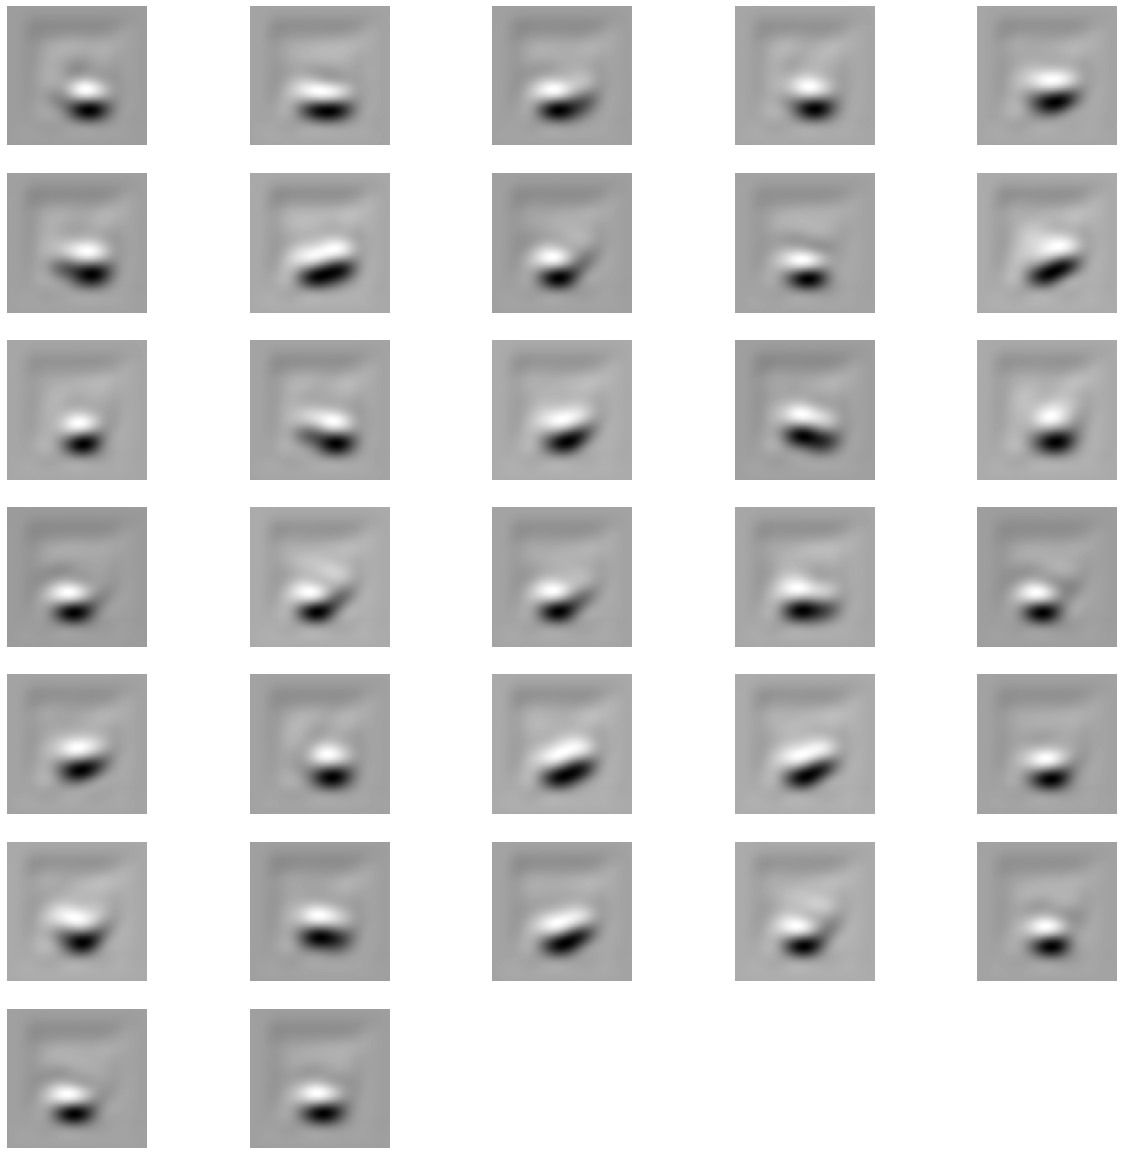

Epoch 0, Generator loss: 0.0831623375415802, discriminator loss: 3.6049496332804365


  0%|          | 0/1519 [00:00<?, ?it/s]

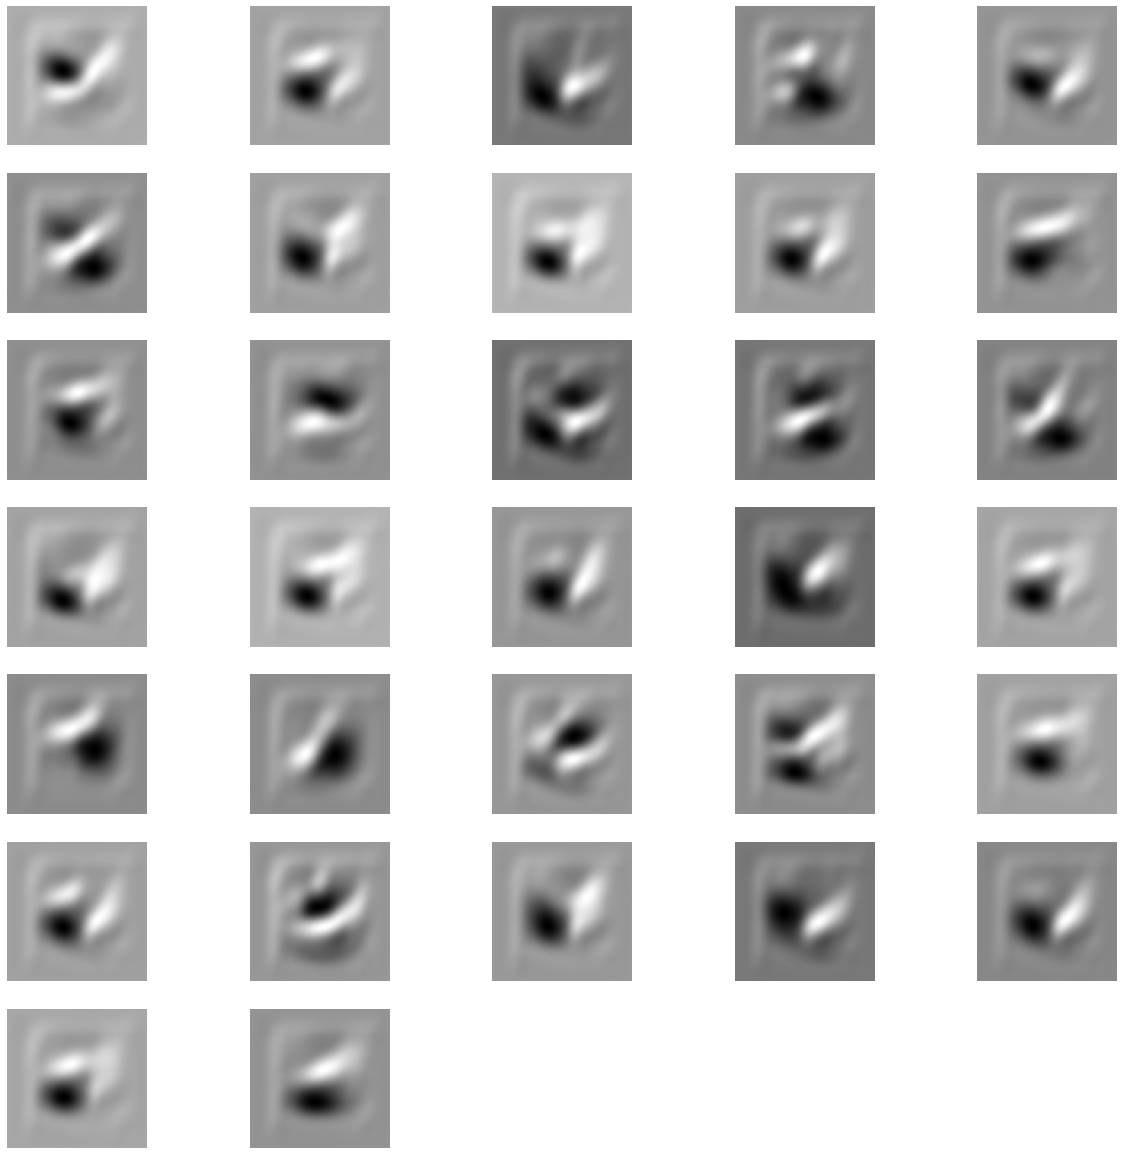

Epoch 1, Generator loss: 0.8107630014419556, discriminator loss: 0.2397373334194223


  0%|          | 0/1519 [00:00<?, ?it/s]

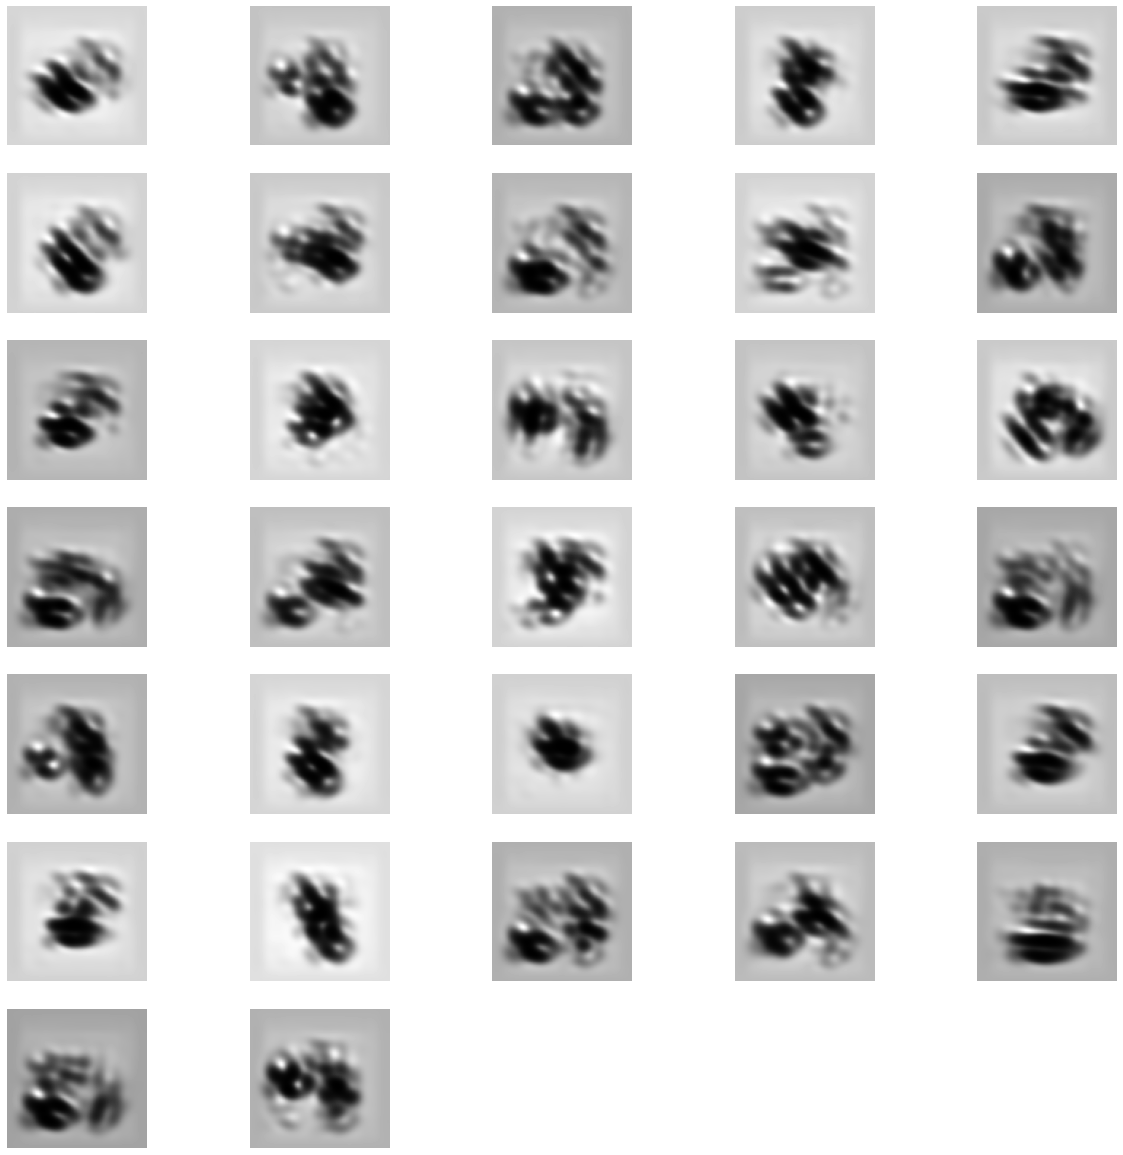

Epoch 2, Generator loss: 6.429222106933594, discriminator loss: -4.508581638336182


  0%|          | 0/1519 [00:00<?, ?it/s]

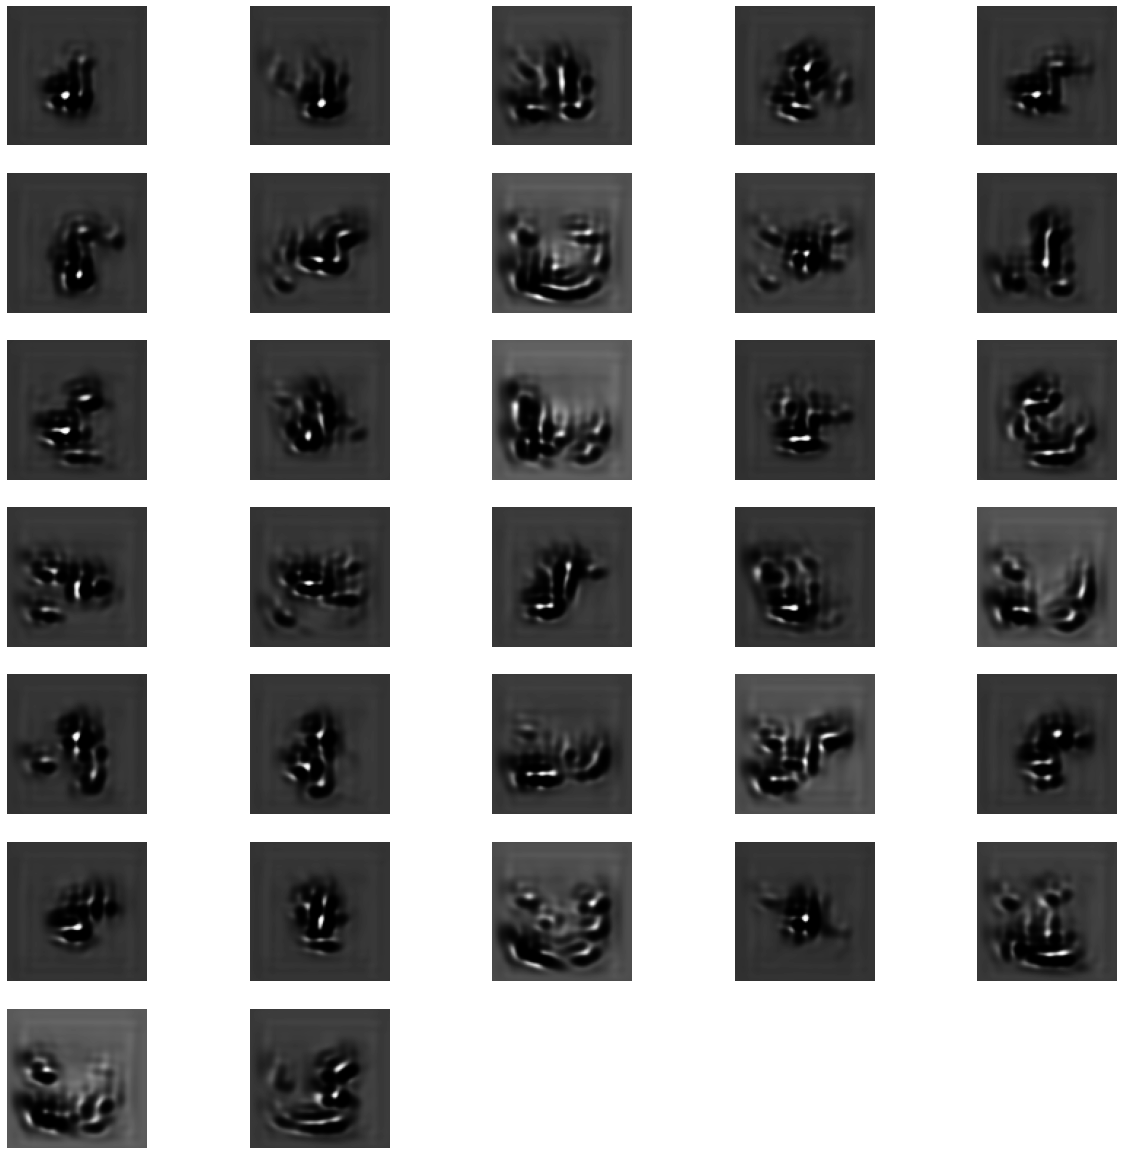

Epoch 3, Generator loss: 5.230828285217285, discriminator loss: -5.106118202209473


  0%|          | 0/1519 [00:00<?, ?it/s]

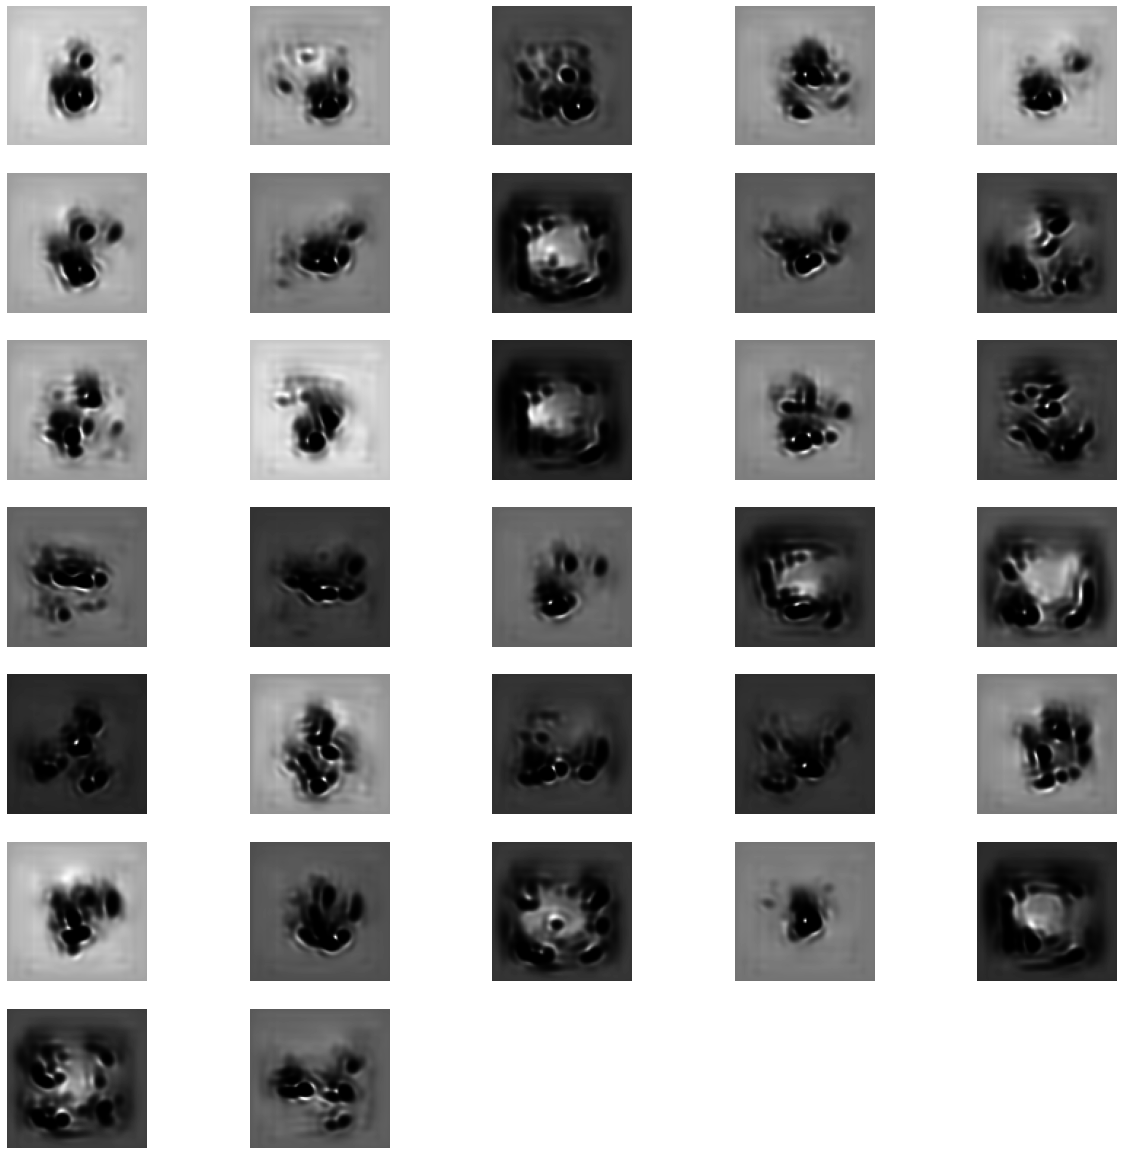

Epoch 4, Generator loss: 1.4786772727966309, discriminator loss: -1.4086910883585613


  0%|          | 0/1519 [00:00<?, ?it/s]

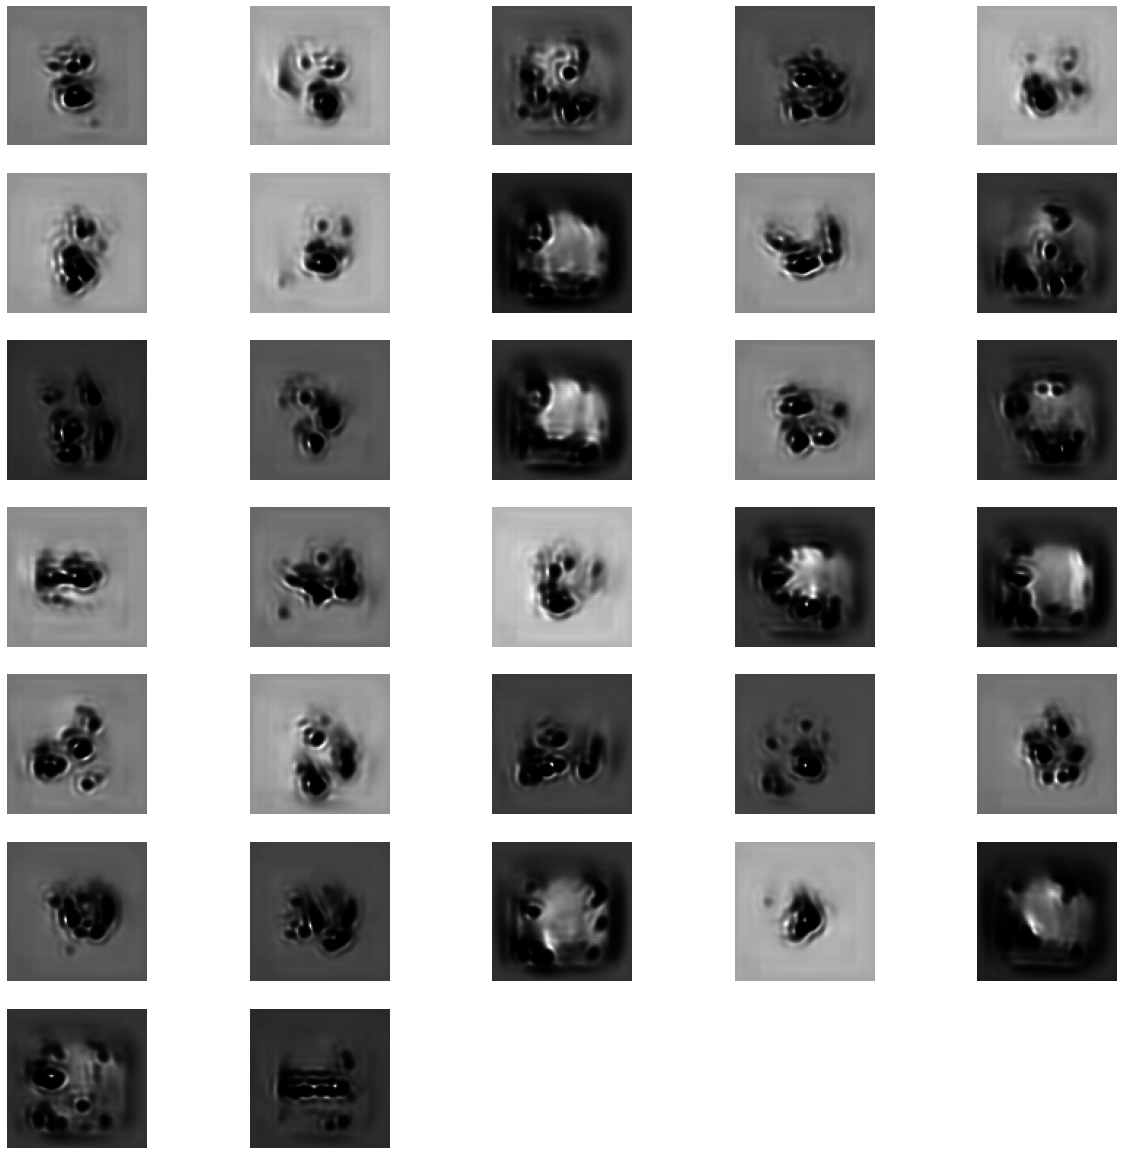

Epoch 5, Generator loss: 0.7557129263877869, discriminator loss: 0.4895198146502177


  0%|          | 0/1519 [00:00<?, ?it/s]

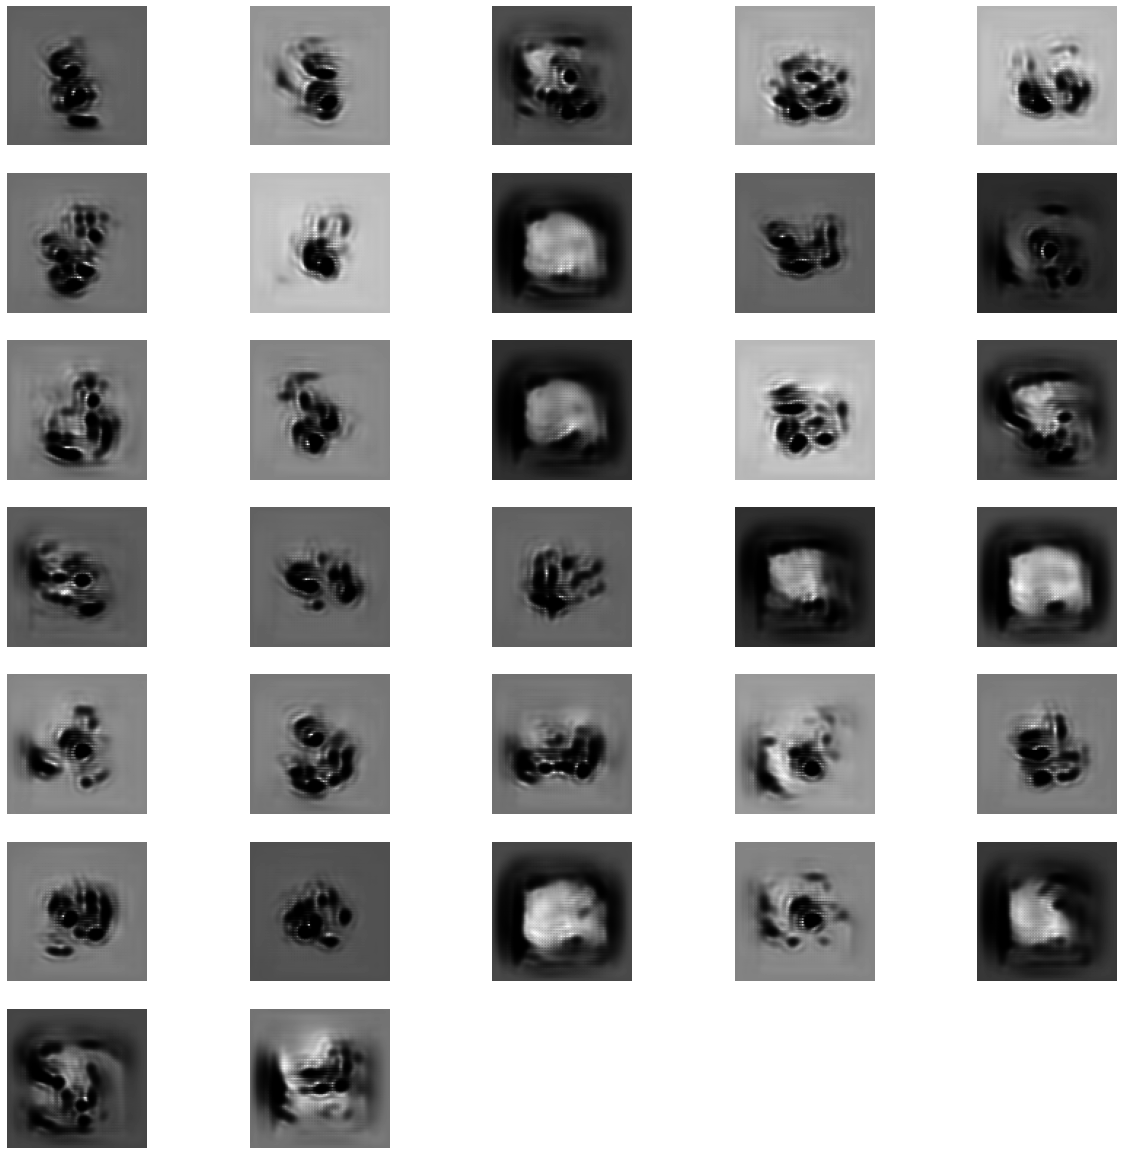

Epoch 6, Generator loss: 1.289071798324585, discriminator loss: 0.05668637404839197


  0%|          | 0/1519 [00:00<?, ?it/s]

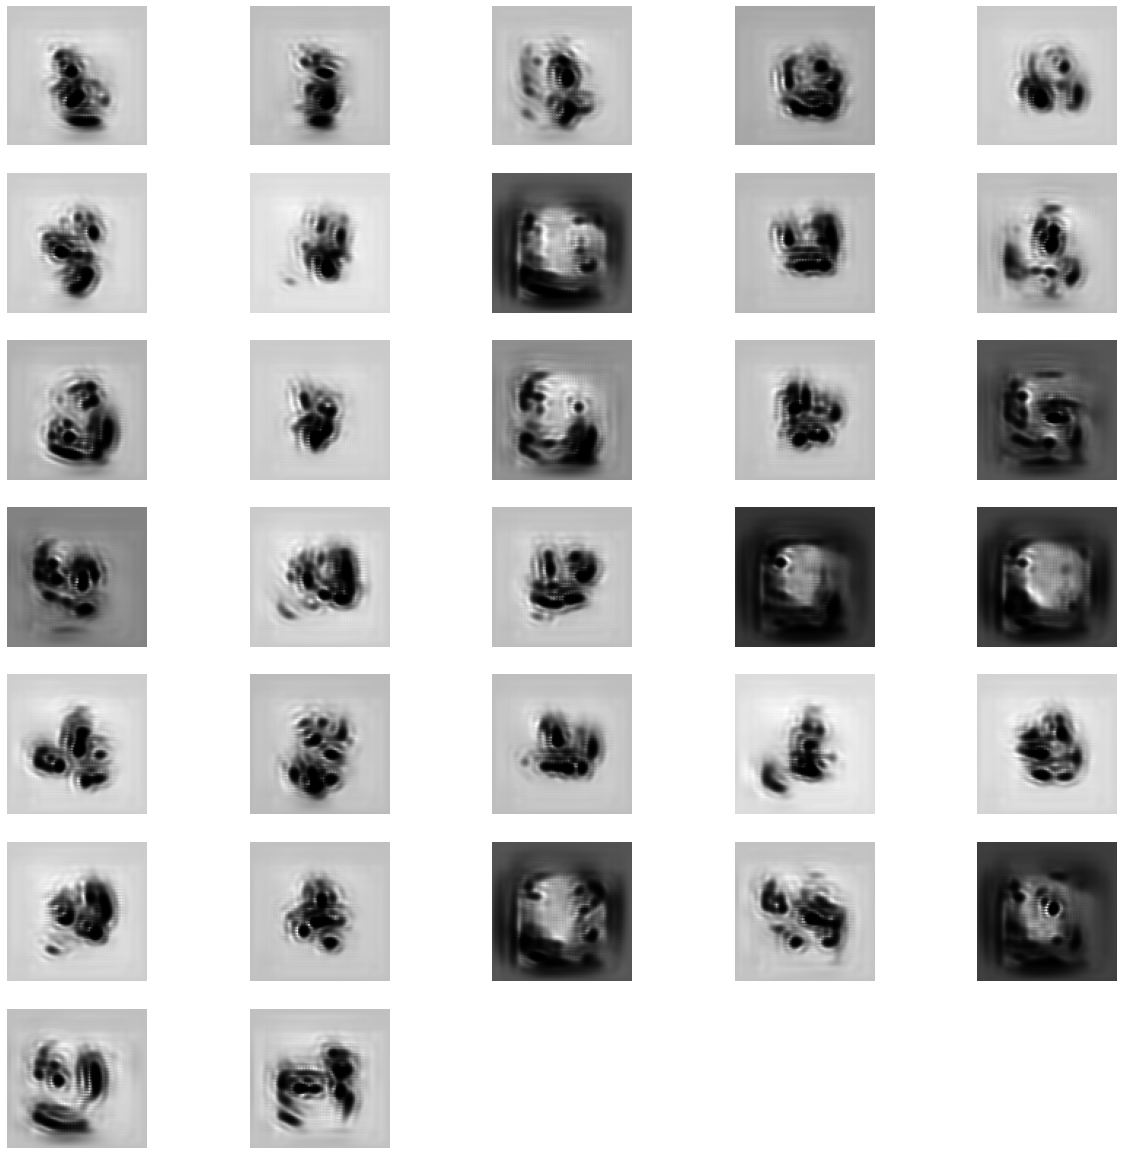

Epoch 7, Generator loss: 1.4981403350830078, discriminator loss: -0.09520554542541504


  0%|          | 0/1519 [00:00<?, ?it/s]

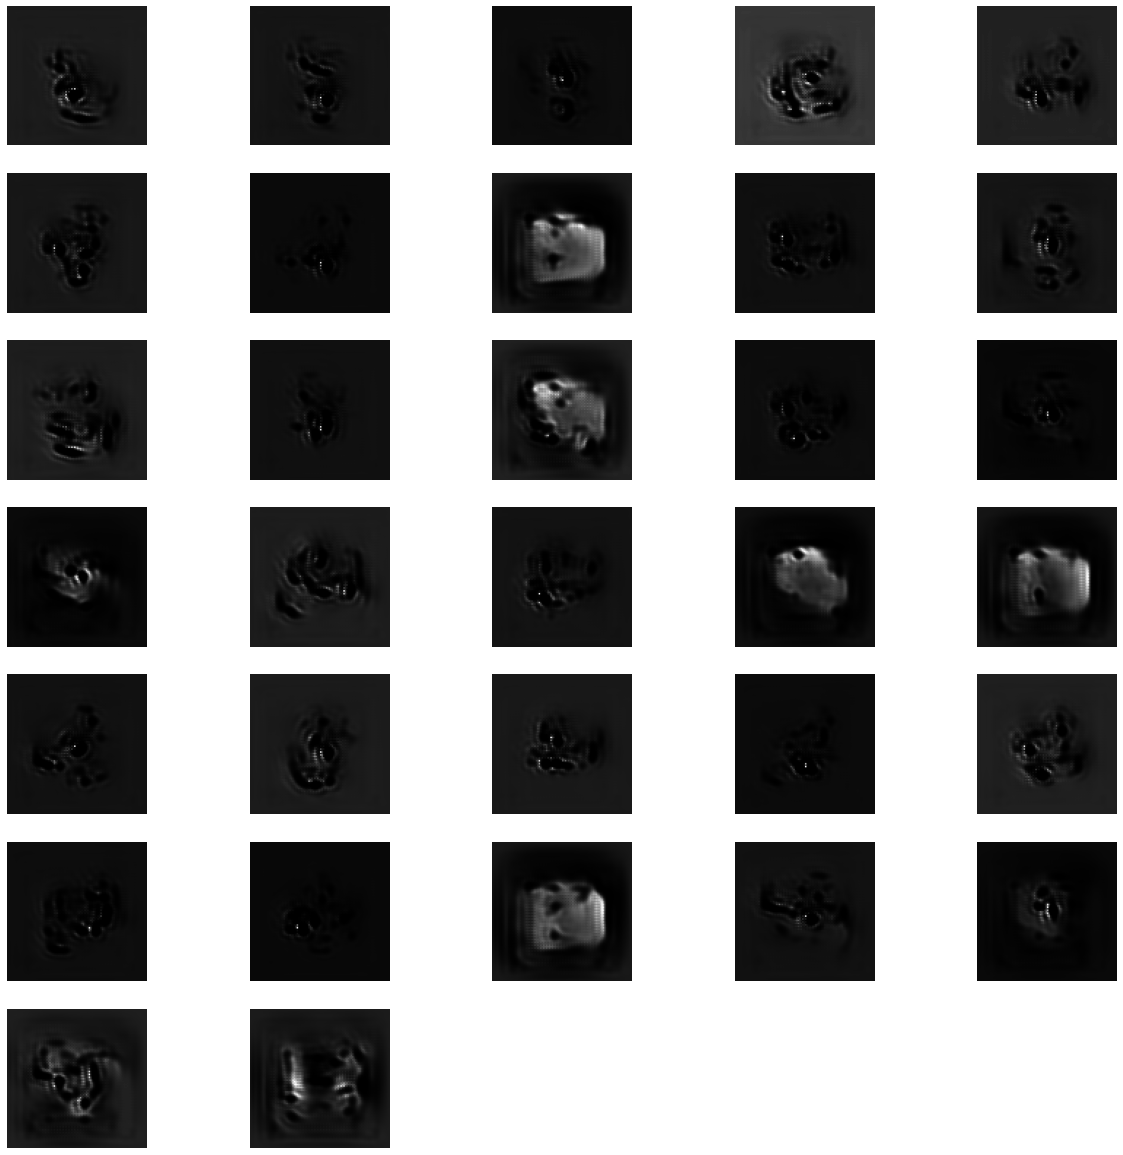

Epoch 8, Generator loss: 0.6495112180709839, discriminator loss: 0.1661882922053337


  0%|          | 0/1519 [00:00<?, ?it/s]

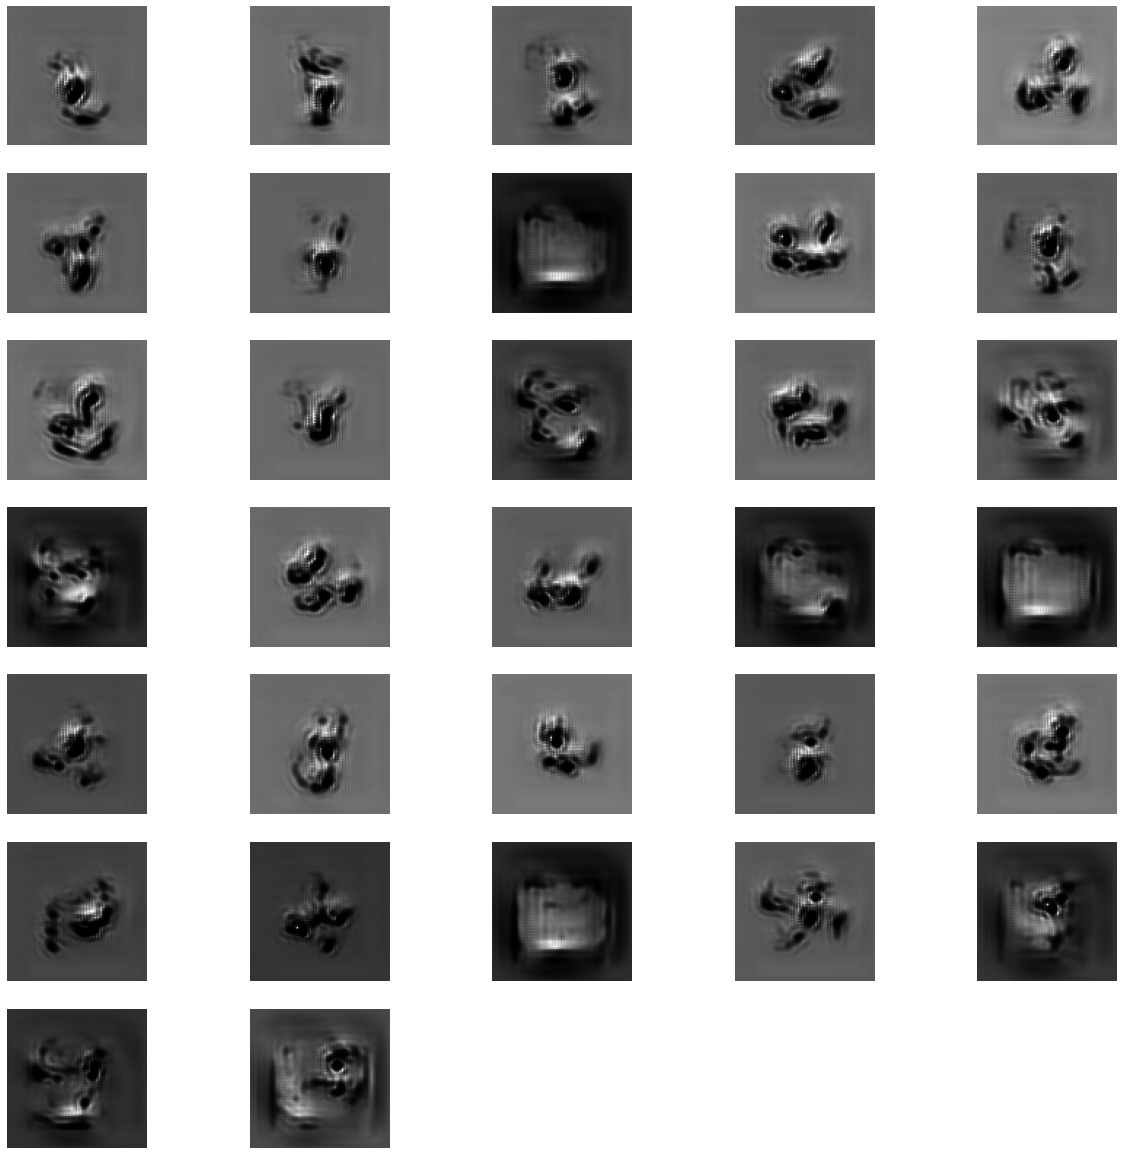

Epoch 9, Generator loss: 0.3617815375328064, discriminator loss: 1.8410717646280923
Finished training the network.


In [8]:
# Lists for storing the losses.
gen_loss_list = []
crit_loss_list = []
test_loss_list = []

# Define a test noise to better show the training progress.
test_noise = get_noise(PREP_BATCH_SIZE, RUN_Z_DIM, RUN_DEVICE)

# Run epoch.
for epoch in range(RUN_EPOCHS):  
    # Set loader count and length for showing the last result of the epoch.
    loader_count = 0
    loader_length = len(loader_train)
    
    # Inside the epoch run each batch from the dataloader.
    for real, _ in tqdm(loader_train):
        # Increase counter.
        loader_count += 1
        
        # Set real image to choosen device.
        real = real.to(RUN_DEVICE)

        mean_iteration_critic_loss = 0
        for _ in range(RUN_CRITIC_REPEAT):
            # Update critic.
            crit_opt.zero_grad()
            fake_noise = get_noise(len(real), RUN_Z_DIM, device=RUN_DEVICE)
            fake = gen(fake_noise)
            crit_fake_pred = crit(fake.detach())
            crit_real_pred = crit(real)
            
            # Calculate the gradient penalty.
            epsilon = torch.rand(len(real), 1, 1, 1, device=RUN_DEVICE, requires_grad=True)
            gradient = get_gradient(crit, real, fake.detach(), epsilon)
            gp = gradient_penalty(gradient)
            crit_loss = get_crit_loss(crit_fake_pred, crit_real_pred, gp, RUN_CRITIC_LAMBDA)

            # Keep track of the average critic loss in this batch.
            mean_iteration_critic_loss += crit_loss.item() / RUN_CRITIC_REPEAT
            
            # Update gradients.
            crit_loss.backward(retain_graph=True)
            
            # Update optimizer.
            crit_opt.step()
        
        # Add the critics loss value to the list.
        crit_loss_list += [mean_iteration_critic_loss]
           
        # Update generator.
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(len(real), RUN_Z_DIM, device=RUN_DEVICE)
        fake_2 = gen(fake_noise_2)
        crit_fake_pred = crit(fake_2)
        gen_loss = get_gen_loss(crit_fake_pred)
        gen_loss.backward()
        gen_opt.step()
        
        # Add the generator loss value to the list.
        gen_loss_list += [gen_loss.item()]

        # Show the generated images.
        if loader_count == loader_length:            
            # Set the generator and critic to evaluation mode.
            gen.eval()
            crit.eval()
            
            # Use the test_noise to create images and calculate the loss.
            test_fake = gen(test_noise)
            test_pred = crit(test_fake.detach())
            test_loss = get_gen_loss(test_pred)
            test_loss_list.append(test_loss.item())

            # Save the model to disk.
            torch.save(gen, '{}model_{:04d}.p'.format(RES_MODEL_PATH, epoch))
            
            # Set the generator and critic back to training mode.
            gen.train()
            crit.train()

            # Create a pyplot with the fake images.
            pred_result = test_fake.cpu().detach().numpy()
            pred_result = pred_result * 127.5 + 127.5
            show_tensor_images(pred_result, [], RES_PLOT_COLUMNS, RES_PLOT_SIZE, 0, 'image_for_epoch_{:04d}'.format(epoch))

            # Print the loss values for this epoch.
            print(f"Epoch {epoch}, Generator loss: {gen_loss.item()}, discriminator loss: {mean_iteration_critic_loss}")

print('Finished training the network.')

## Results
### Description
* Show loss value in a line diagram.
* Save the loss values to file.
* Create a gif file from the single png files.
* Show the gif file.

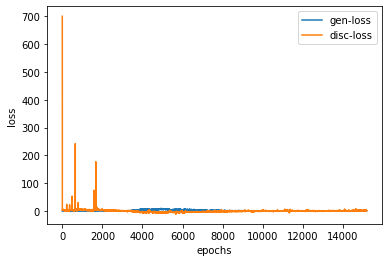

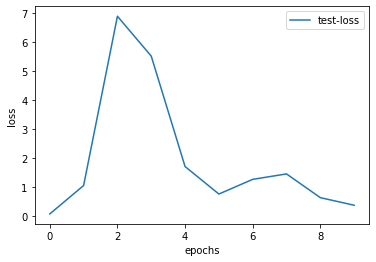

Finished showing results.


In [9]:
# Show loss value for each step in the training process.
plt.plot(np.array(gen_loss_list), label='gen-loss')
plt.plot(np.array(crit_loss_list), label='disc-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig(RES_LOSS_PLOT_TRAIN)
plt.show()

# Show loss value for the test noise.
plt.plot(np.array(test_loss_list), label='test-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig(RES_LOSS_PLOT_TEST)
plt.show()

# Store data in text files.
np.savetxt(RES_LOSS_DATA_CRIT, np.array(crit_loss_list))
np.savetxt(RES_LOSS_DATA_GEN, np.array(gen_loss_list))
np.savetxt(RES_LOSS_DATA_TEST, np.array(test_loss_list))

# Create a gif file from the single png files.
with imageio.v2.get_writer(RES_GIF_FILE, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.v2.imread(filename)
    writer.append_data(image)
  image = imageio.v2.imread(filename)
  writer.append_data(image)

print('Finished showing results.')

In [10]:
# !!! This line needs to be in an extra cell. !!!
# Show the gif file.
Image(url=RES_GIF_FILE)